In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
#from plotnine import *

In [18]:
projetos = pd.read_csv('resultado_projetos2.csv')

In [19]:
projetos

,Unnamed: 0,nome,segmento,area,data_inicio,UF,municipio,valor_captado,valor_projeto,valor_proposta,valor_aprovado
0,0,WEBSÉRIE MUNDO MINERAL,Produção de websérie,Audiovisual,2023-03-02,MG,Belo Horizonte,0.0,299777.00,299777.00,290077.00
1,1,PRINCESA DAS EMOÇÕES,Prod. AV curta/média mtragem inc rádio/tv edu ...,Audiovisual,2022-01-01,RJ,Rio de Janeiro,0.0,198258.50,198258.50,198258.50
2,2,Os Herdeiros,Produção de websérie,Audiovisual,2022-04-01,SP,Santo André,0.0,179660.25,179660.25,179660.25
3,3,Copa Colegial de Empreendedorismo,Ações de capacitação e treinamento de pessoa,Audiovisual,2022-03-01,RS,Porto Alegre,0.0,2761309.00,2761309.00,2761309.00
4,4,2º FALA São Chico Festival Audiovisual Latino ...,Difusão de acerv e conteúdo AV diver meios/sup...,Audiovisual,2022-10-31,SC,Florianópolis,0.0,399995.91,399995.91,399995.91
...,...,...,...,...,...,...,...,...,...,...,...
35364,49890,Bianka de Liz com Vozes e Mulheres Catarinas,Música Popular Cantada,Música,2014-09-28,SC,São José,0.0,456500.00,456500.00,456500.00
35365,49891,Livelyup - Música por Solidariedade,Música Popular Cantada,Música,2014-05-27,PR,Curitiba,0.0,503137.80,503137.80,503137.80
35366,49892,"?Som, Música, Ação gera Criação?",Música Instrumental,Música,2014-06-18,SC,Taió,0.0,261025.00,286275.00,261025.00
35367,49893,P.A.Z Paredes Art Zone,Projeto educativo de artes visuais,Artes Visuais,2015-01-10,RJ,Rio de Janeiro,0.0,188650.00,188650.00,178650.00


In [20]:
#Menor dos valores captados -> projetos gratuitos
projetos['valor_captado'].min()

0.0

In [76]:
#Maior dos valores captados -> projetos gratuitos
projetos['valor_captado'].max()

86510216.63

In [98]:
#Média dos valores captado
projetos_nao_gratuitos = projetos[projetos['valor_captado'] > 0]

media_valor_captado = projetos_nao_gratuitos['valor_captado'].mean()
media_valor_captado = np.round(media_valor_captado, 0)
media_valor_captado

712030.0

In [147]:
dist_medias = pd.DataFrame()

for index, projeto in projetos.iterrows():
    if projeto['valor_aprovado'] > media_valor_captado:
        dist_medias = dist_medias.append({"acima_da_media": 'acima'}, ignore_index=True)
    else:
        dist_medias =  dist_medias.append({"acima_da_media": 'abaixo'}, ignore_index=True)
        
dist_medias

,acima_da_media
0,abaixo
1,abaixo
2,abaixo
3,acima
4,abaixo
...,...
35324,abaixo
35325,abaixo
35326,abaixo
35327,abaixo


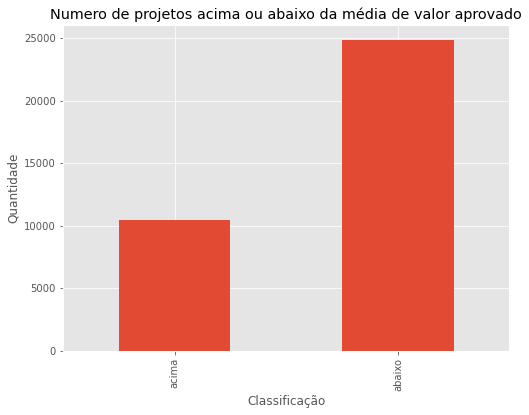

In [158]:
plt.style.use("ggplot")
plt.figure(figsize = (8, 6))
plt.title("Numero de projetos acima ou abaixo da média de valor aprovado")
dist_medias.groupby('acima_da_media').size().sort_values().plot(kind='bar')
plt.xlabel("Classificação")
plt.ylabel("Quantidade")
plt.show()

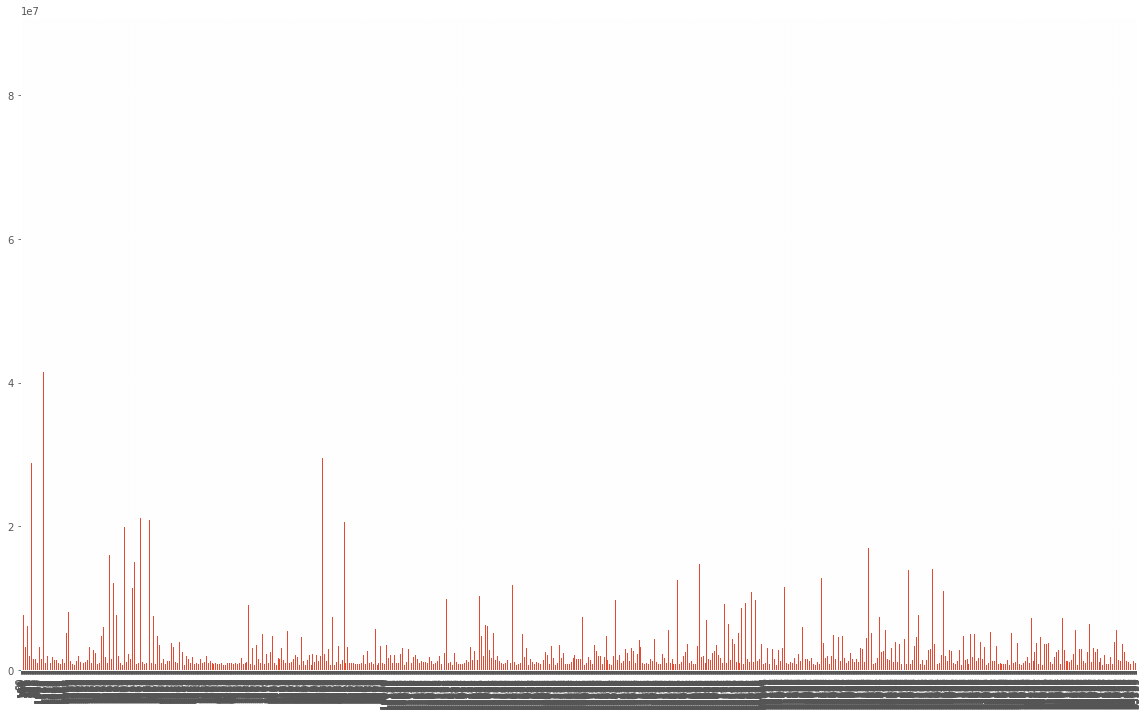

In [97]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))

projetos[projetos['valor_captado'] > media_valor_captado]['valor_captado'].plot(kind='bar')
plt.show()
#plt.scatter(x, y, color='red')

In [21]:
projetos['valor_proposta'].min()

0.0

In [22]:
projetos['valor_aprovado'].min()

-15218432.0

In [23]:
valores_negativos = projetos[projetos['valor_aprovado'] < 0].index
valores_negativos

Int64Index([ 1188,  1200,  1954,  1960,  2042,  2710,  2738,  2765,  3007,
             3118,  3304,  3381,  3388,  3644,  3863,  3895,  4851,  5029,
             5607,  5774,  5801,  5937,  6553,  6745,  6928,  7055,  7308,
             7507,  7678,  8171,  8497,  9616, 10011, 11176, 12729, 15704,
            16282, 19796, 20349, 25952],
           dtype='int64')

In [24]:
projetos.drop(valores_negativos, inplace=True)

In [25]:
projetos['valor_aprovado'].min()

0.0

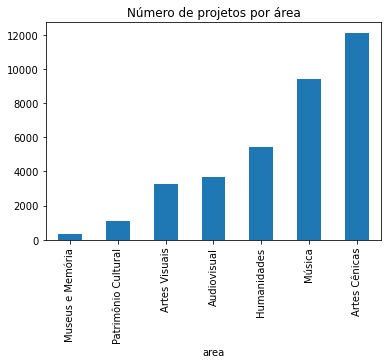

In [66]:
projetos.groupby("area")["area"].size().sort_values().plot(kind='bar')
plt.title("Número de projetos por área")
plt.show()

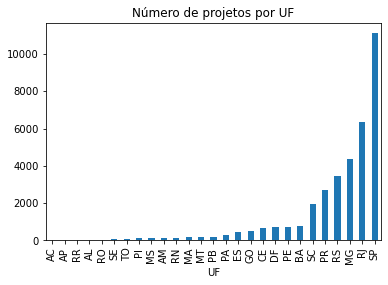

In [65]:
projetos.groupby('UF')['UF'].size().sort_values().plot(kind='bar')
plt.title("Número de projetos por UF")
plt.show()

In [30]:
aprovados = projetos['valor_aprovado']
aprovados = list(aprovados)
len(aprovados)

35329

In [31]:
isinstance(aprovados, list)

True

In [51]:
medias = [] 

for i in range(0, 200):
    y = random.sample(aprovados, 500)
    avg = np.mean(y)
    medias.append(np.round(avg,0))
    #print(np.round(avg,0))
    
#len(medias)

In [55]:
k = math.ceil(1 + 3.3 * math.log10(len(medias) ))
k

9

In [53]:
k = int(math.sqrt( len(medias) ))
k

14

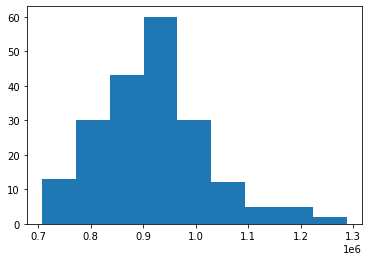

In [56]:
plt.hist(medias, bins=k) 
plt.show()

In [58]:
aprovados = stats.zscore(aprovados)

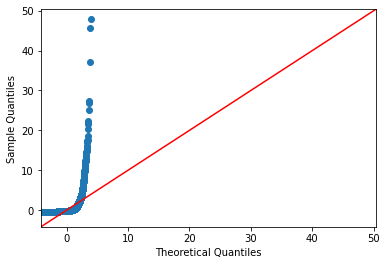

In [64]:
sm.qqplot(aprovados, line ='45') 
py.show() 

In [61]:
k = int(math.sqrt( (projetos['valor_proposta'].size )))
k

187

C:\Users\San Diego\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 18.56813587847406] is not finite

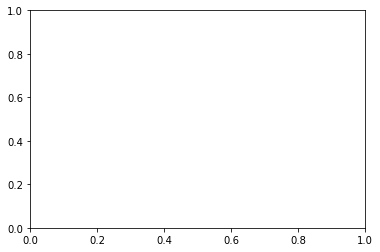

In [62]:
plt.hist(np.log(projetos['valor_proposta']), bins=k) 

<AxesSubplot:>

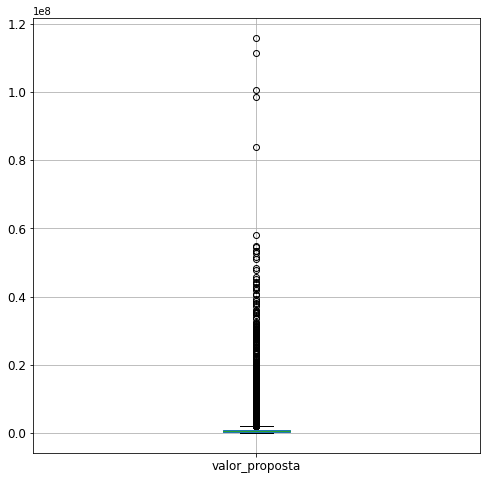

In [140]:
projetos.boxplot(column=['valor_aprovado'], fontsize='large', figsize=(8,8))